# Saumit-AIML-Assessment 

## Saumit Kunder 
## 21070126078
## AIML -B1 

# Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor



# DATASET

In [26]:
train_df = pd.read_excel("./traindataset.xlsx")


In [27]:
train_df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044


In [28]:
train_df.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [29]:
train_df.dtypes

ProductType                  object
Manufacturer                 object
Area Code                    object
Sourcing Channel             object
Product Size                 object
Product Type                 object
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object

In [30]:
test_df=pd.read_excel("./testdata.xlsx")


# EDA

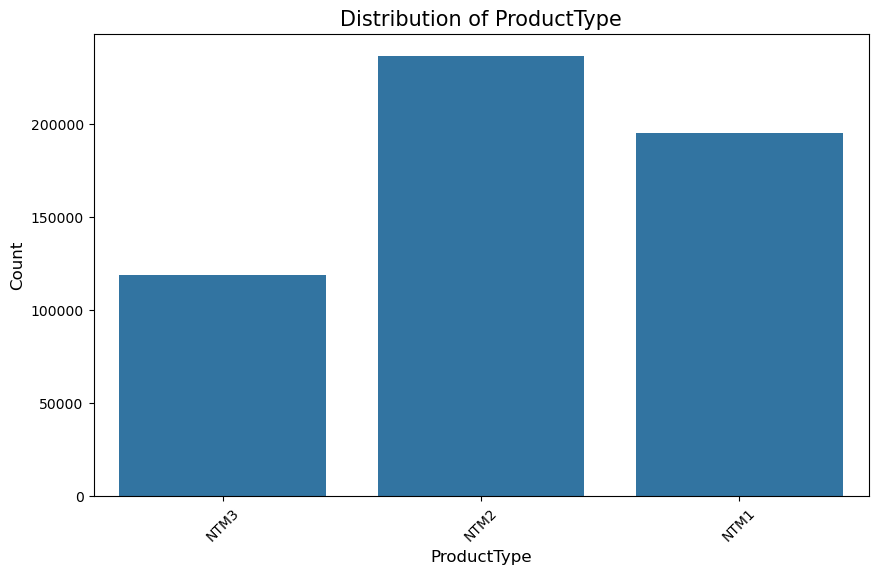

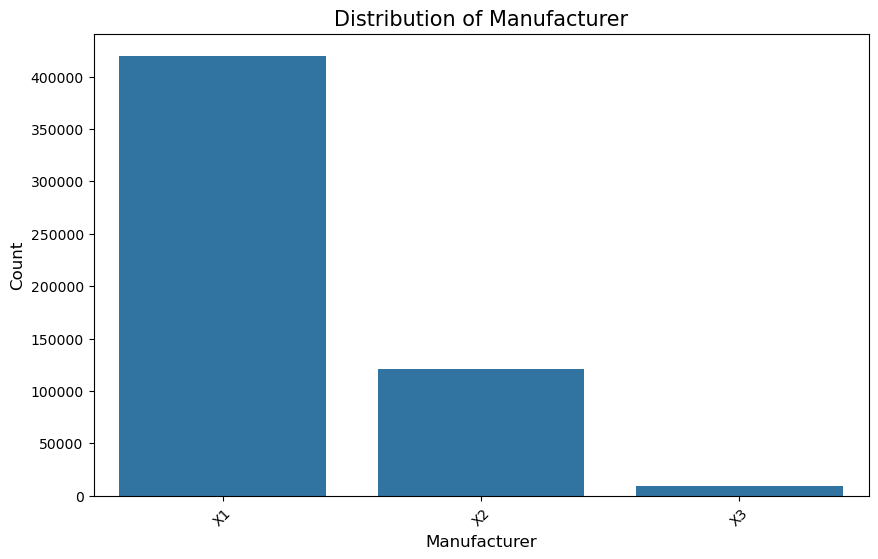

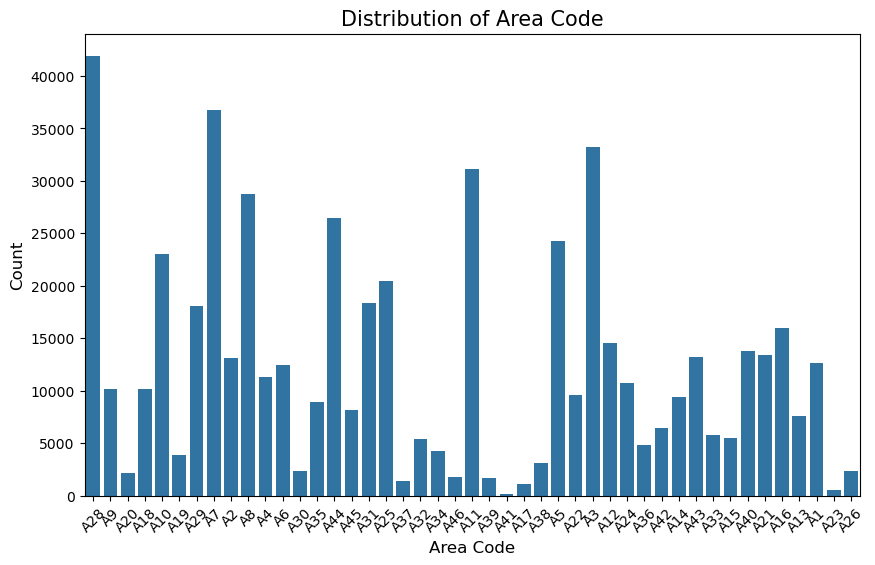

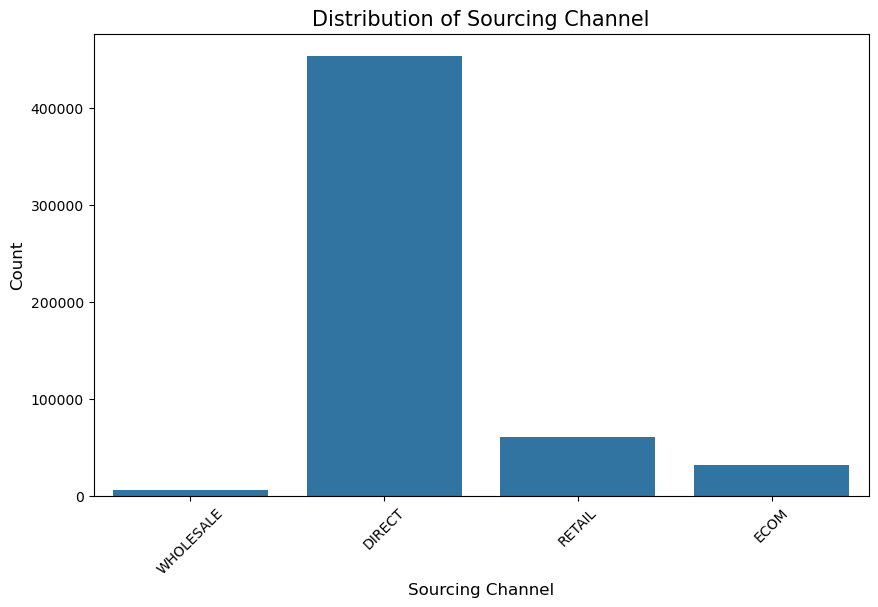

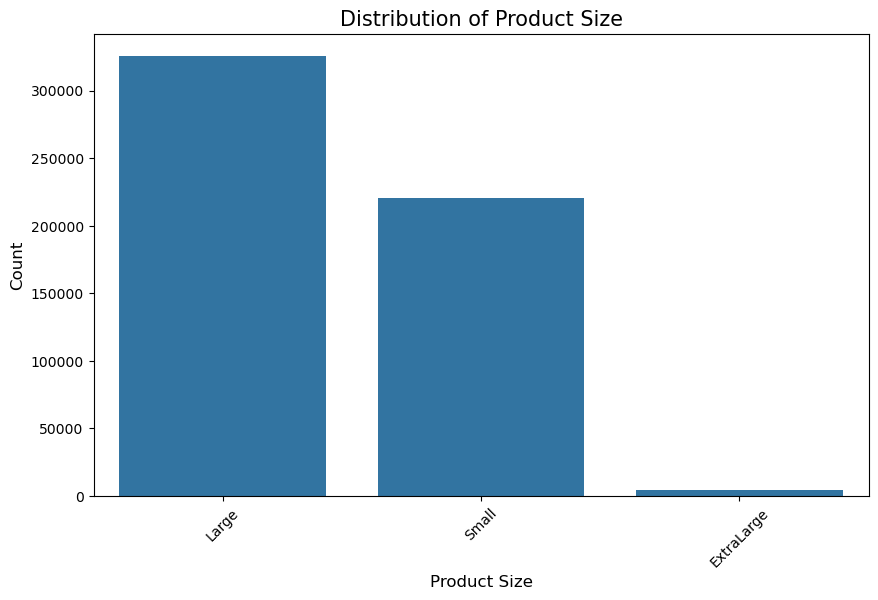

In [39]:
# List of categorical columns
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size']

# Plot count plots for each categorical feature
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

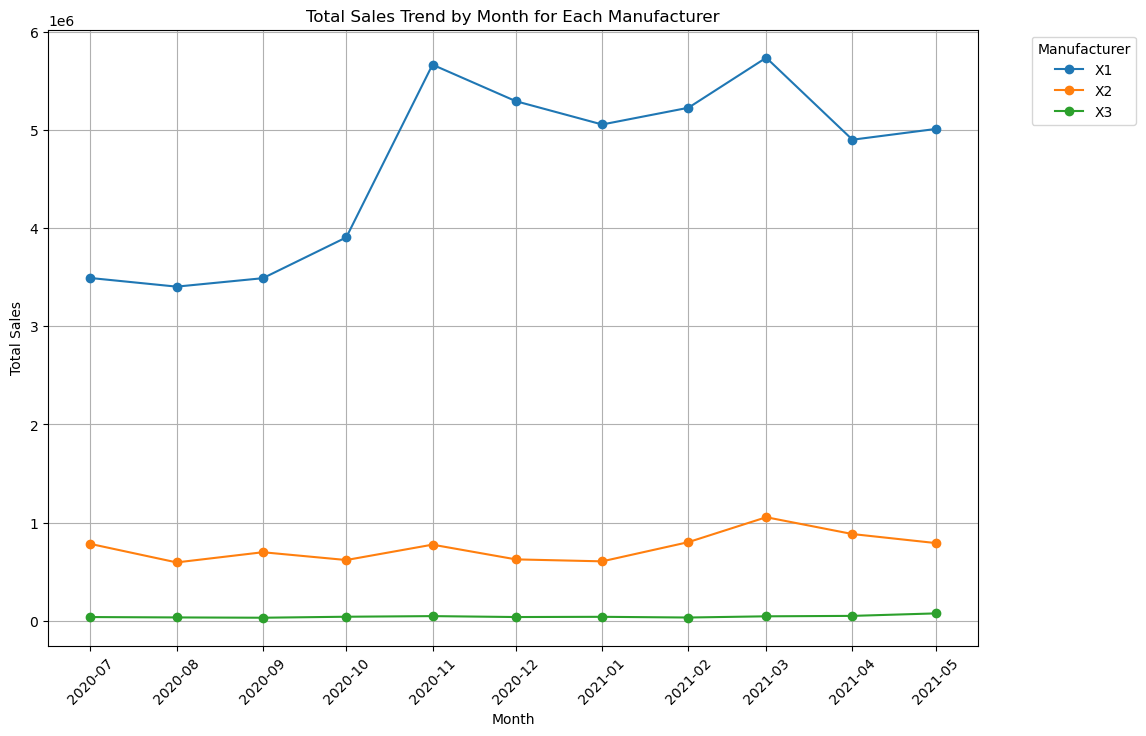

In [31]:
# Convert 'Month of Sourcing' column to datetime
train_df['Month of Sourcing'] = pd.to_datetime(train_df['Month of Sourcing'])

# Group data by both manufacturer and month and calculate total sales
monthly_sales_by_manufacturer = train_df.groupby(['Manufacturer', train_df['Month of Sourcing'].dt.to_period('M')])['Sourcing Cost'].sum()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate through each manufacturer
for manufacturer, sales in monthly_sales_by_manufacturer.groupby(level=0):
    plt.plot(sales.index.get_level_values('Month of Sourcing').to_timestamp(), sales.values, marker='o', linestyle='-', label=manufacturer)

plt.title('Total Sales Trend by Month for Each Manufacturer')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

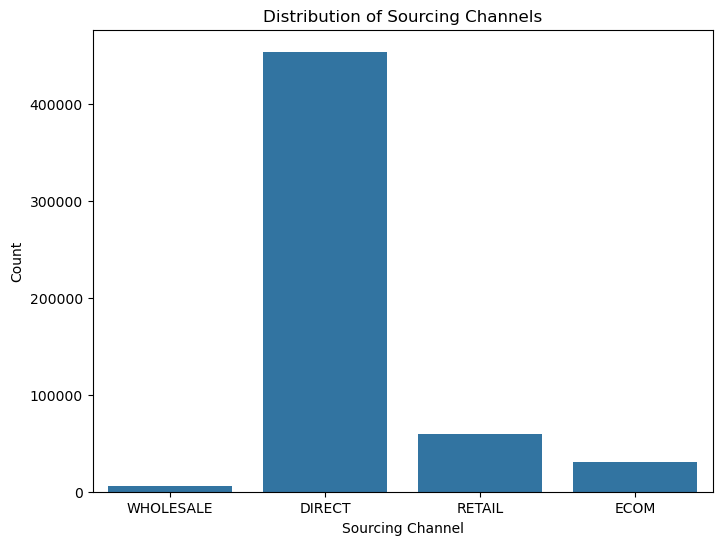

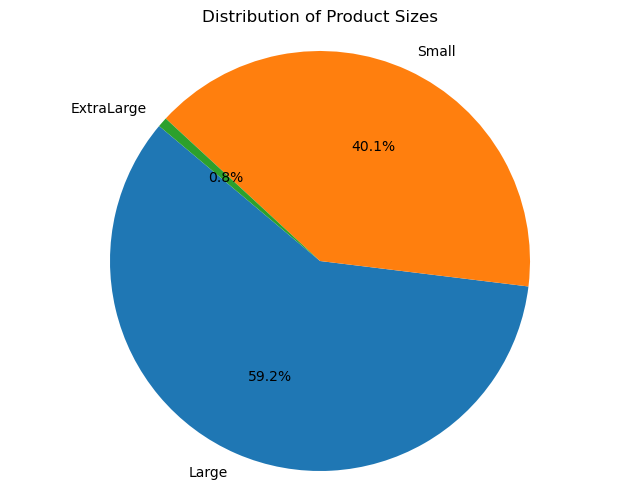

In [32]:
# Distribution of Sourcing Channels
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sourcing Channel')
plt.title('Distribution of Sourcing Channels')
plt.xlabel('Sourcing Channel')
plt.ylabel('Count')
plt.show()

# Distribution of Product Sizes
plt.figure(figsize=(8, 6))
sizes = train_df['Product Size'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Sizes')
plt.axis('equal')
plt.show()

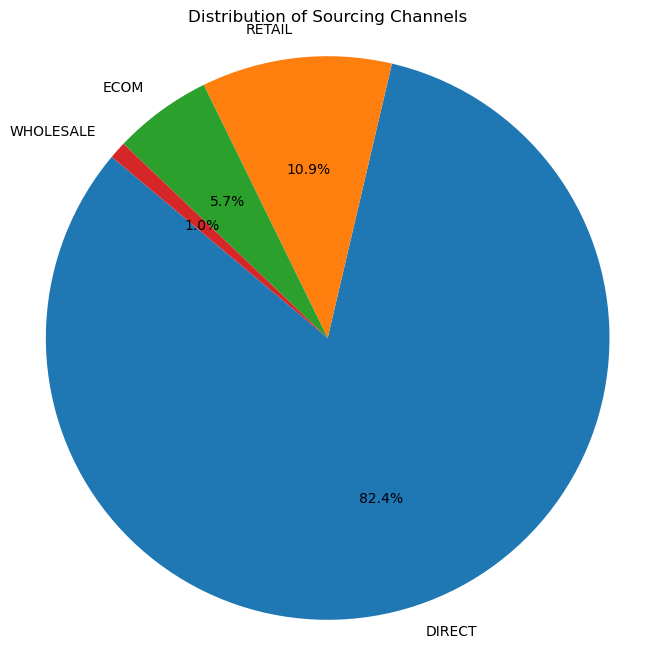

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/2719704464.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='Manufacturer', y='Sourcing Cost', hue='Sourcing Channel', ci=None)


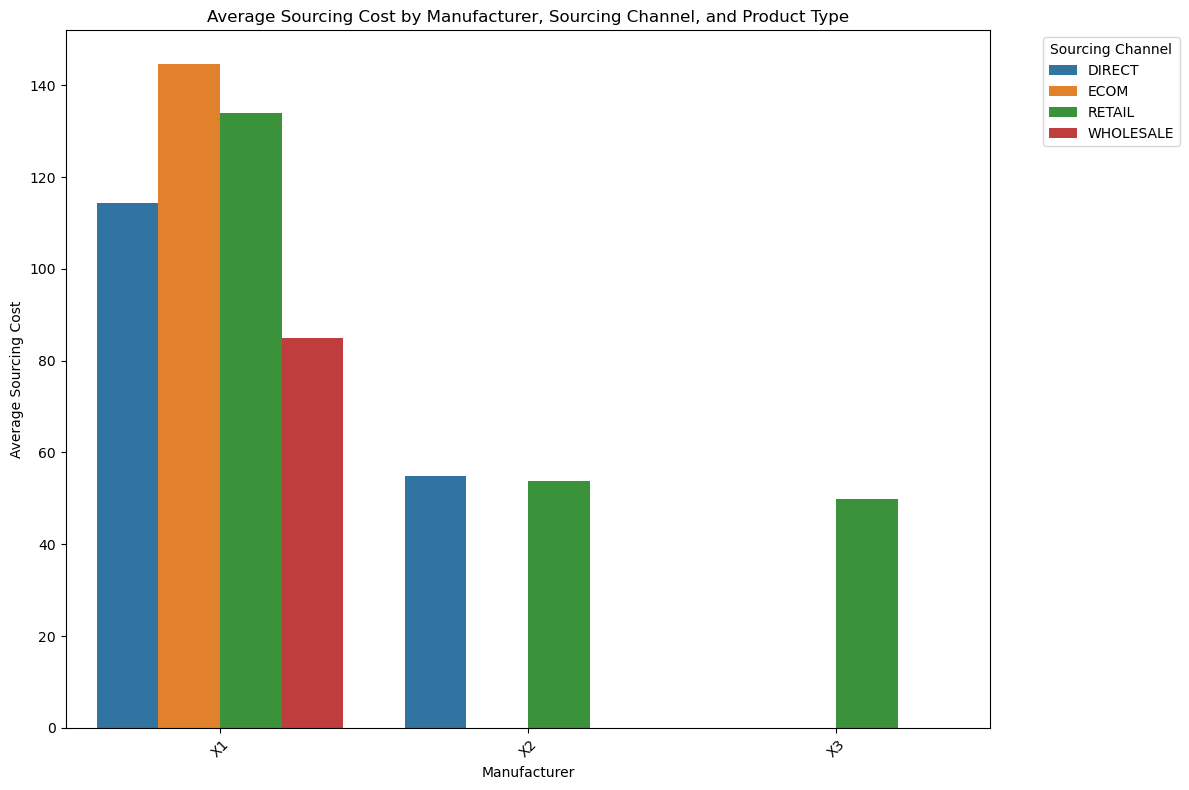

In [33]:
# Calculate the frequency of each sourcing channel
channel_counts = train_df['Sourcing Channel'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sourcing Channels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Group data by Manufacturer, Sourcing Channel, and Product Type and calculate average sourcing cost
grouped_data = train_df.groupby(['Manufacturer', 'Sourcing Channel', 'Product Type'])['Sourcing Cost'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='Manufacturer', y='Sourcing Cost', hue='Sourcing Channel', ci=None)
plt.title('Average Sourcing Cost by Manufacturer, Sourcing Channel, and Product Type')
plt.xlabel('Manufacturer')
plt.ylabel('Average Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Sourcing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3878640288.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_df, x='Product Type', y='Sourcing Cost', ci=None)


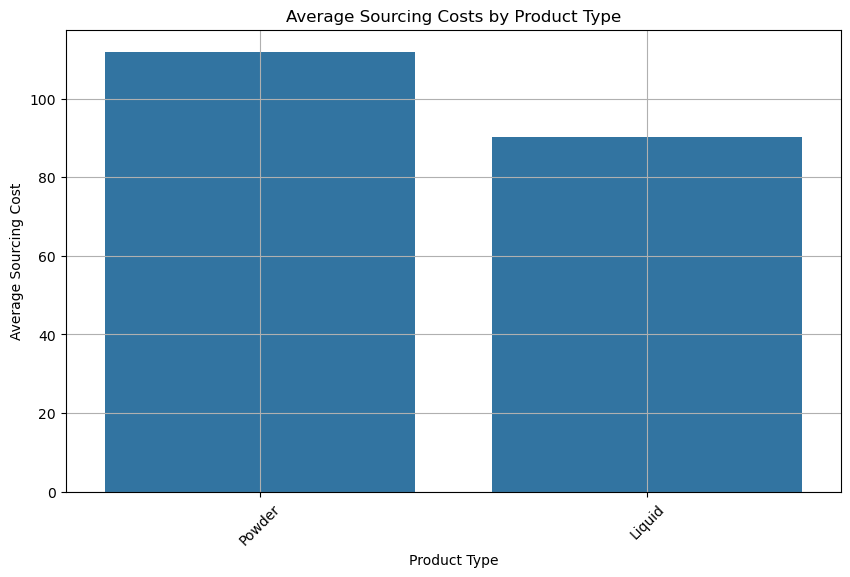

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Product Type', y='Sourcing Cost', ci=None)
plt.title('Average Sourcing Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Sourcing Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

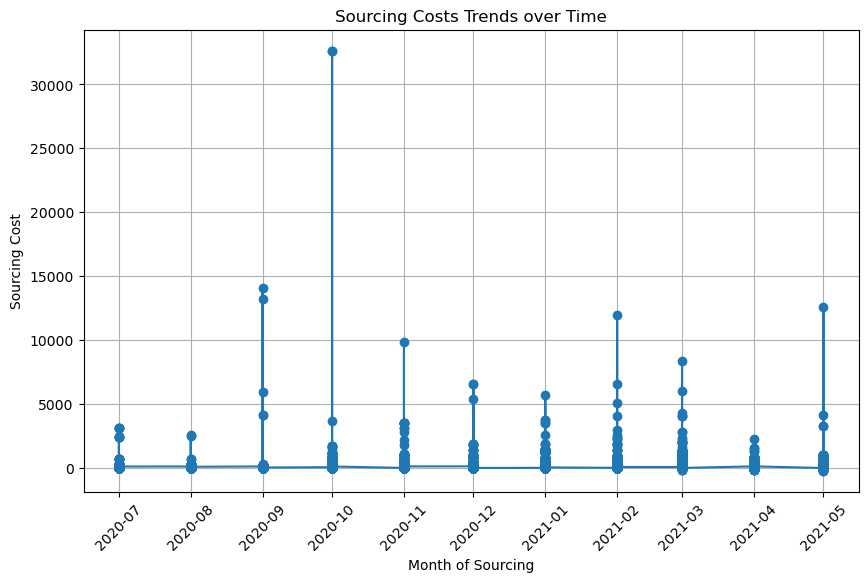

In [35]:
# Convert 'Month of Sourcing' column to datetime
train_df['Month of Sourcing'] = pd.to_datetime(train_df['Month of Sourcing'])

# Sort the DataFrame by 'Month of Sourcing' for plotting
df = train_df.sort_values('Month of Sourcing')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Month of Sourcing'], df['Sourcing Cost'], marker='o', linestyle='-')
plt.title('Sourcing Costs Trends over Time')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

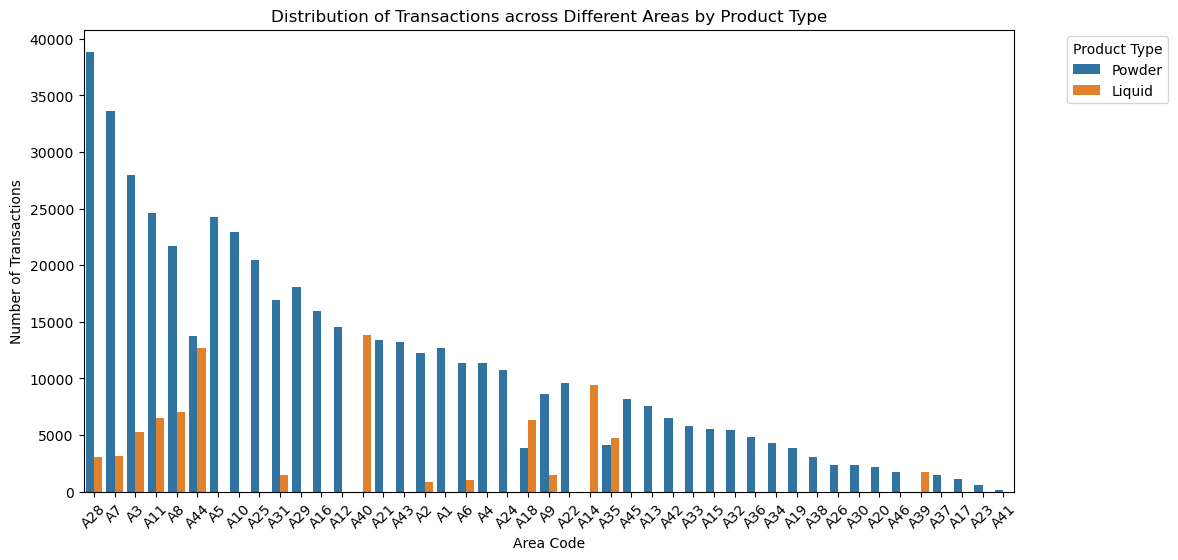

In [36]:

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Area Code', hue='Product Type', order=df['Area Code'].value_counts().index)
plt.title('Distribution of Transactions across Different Areas by Product Type')
plt.xlabel('Area Code')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Outlier Detection 

In [40]:
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(df['Sourcing Cost'])

# Define threshold for outlier detection
threshold = 3

# Identify outliers
outliers = df['Sourcing Cost'][abs(z_scores) > threshold]

# Print outliers
print("Outliers identified using z-score method:")
print(outliers)
# Count outliers identified using z-score method
outliers_count_zscore = len(outliers)
print("Number of outliers identified using z-score method:", outliers_count_zscore)


Outliers identified using z-score method:
332368    3125.792
358951    3125.792
30326      720.000
147317    2412.380
138809    2412.380
            ...   
430963     948.896
431023     536.562
431121     948.896
72238      444.600
73142      450.047
Name: Sourcing Cost, Length: 1364, dtype: float64
Number of outliers identified using z-score method: 1364


In [41]:
# Calculate IQR
Q1 = df['Sourcing Cost'].quantile(0.25)
Q3 = df['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outlier detection
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Sourcing Cost'] < lower_threshold) | (df['Sourcing Cost'] > upper_threshold)]['Sourcing Cost']

# Print outliers
print("Outliers identified using IQR method:")
print(outliers_iqr)
# Count outliers identified using IQR method
outliers_count_iqr = len(outliers_iqr)
print("Number of outliers identified using IQR method:", outliers_count_iqr)


Outliers identified using IQR method:
342015    288.119
481412    288.119
41555     336.522
486424    288.119
327259    288.119
           ...   
430963    948.896
431023    536.562
431121    948.896
72238     444.600
73142     450.047
Name: Sourcing Cost, Length: 2666, dtype: float64
Number of outliers identified using IQR method: 2666


# Model Training 

 ## Random Forest 

/Users/saumit/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest - Mean Squared Error: 1074.392396515443
Random Forest - Mean Absolute Error: 16.569576087977335
Random Forest - R-squared: 0.6039775180717608
Random Forest - Root Mean Squared Error: 32.77792544557149


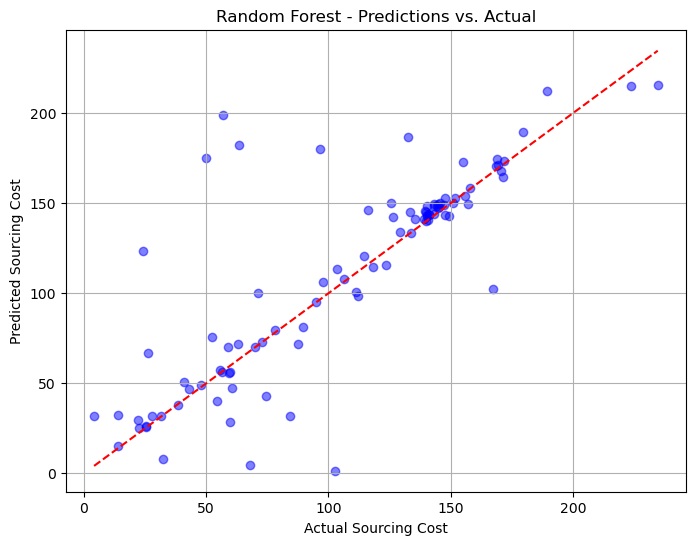

In [66]:
# Convert 'Month of Sourcing' to datetime
train_df['Month of Sourcing'] = pd.to_datetime(train_df['Month of Sourcing'])
test_df['Month of Sourcing'] = pd.to_datetime(test_df['Month of Sourcing'])

# Extract features from datetime column
train_df['Year'] = train_df['Month of Sourcing'].dt.year
train_df['Month'] = train_df['Month of Sourcing'].dt.month
# Add more features as needed

test_df['Year'] = test_df['Month of Sourcing'].dt.year
test_df['Month'] = test_df['Month of Sourcing'].dt.month
# Add more features as needed

# Separate features (X) and target variable (y) for train and test datasets
X_train = train_df.drop(columns=['Sourcing Cost'])
y_train = train_df['Sourcing Cost']
X_test = test_df.drop(columns=['Sourcing Cost'])
y_test = test_df['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert encoded arrays to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_train_final = pd.concat([X_train_encoded.reset_index(drop=True), train_df[['Year', 'Month']].reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_encoded.reset_index(drop=True), test_df[['Year', 'Month']].reset_index(drop=True)], axis=1)


# Train the Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_final, y_train)

# Evaluate the model
y_pred_rf = random_forest_model.predict(X_test_final)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - R-squared:", r2_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Random Forest - Predictions vs. Actual')
plt.grid(True)
plt.show()


#### Random forest model using z-score for outlier/anomaly detecion : Here the outliers are filtered out using z-score and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/413946491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month of Sourcing'] = pd.to_datetime(df_no_outliers['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/413946491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Year'] = df_no_outliers['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/413946491.py:12: SettingWithCopyWarn

Mean Squared Error: 483.1666160749332
Mean Absolute Error: 9.808285055001443
R-squared: 0.8515149784801571
Root Mean Squared Error: 21.98105129594427


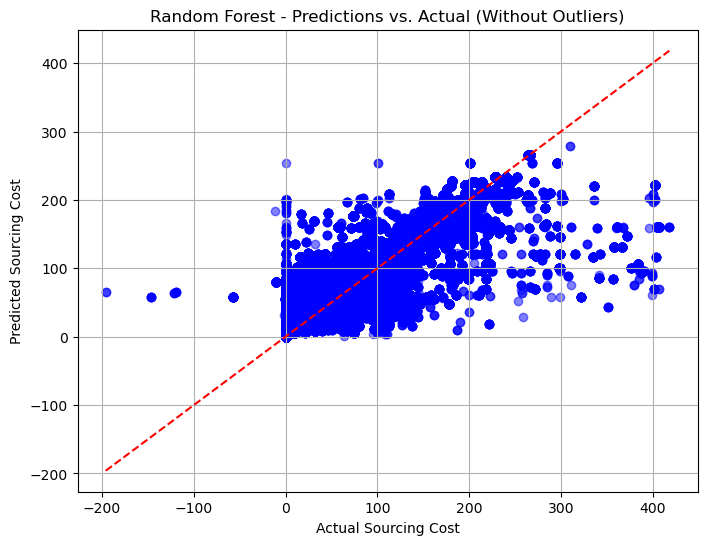

In [67]:
# Filter out outliers from the original dataset
df_no_outliers = df[abs(z_scores) <= threshold]

# Identify categorical columns
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers['Month of Sourcing'] = pd.to_datetime(df_no_outliers['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers['Year'] = df_no_outliers['Month of Sourcing'].dt.year
df_no_outliers['Month'] = df_no_outliers['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers.drop(columns=['Sourcing Cost'])
y = df_no_outliers['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the random forest model
model = RandomForestRegressor()
model.fit(X_final, y)

# Predict using the trained model
y_pred = model.predict(X_final)

# Evaluate the model
mse_rf_zscore = mean_squared_error(y, y_pred)
mae_rf_zscore = mean_absolute_error(y, y_pred)
r2_rf_zscore= r2_score(y, y_pred)
rmse_rf_zscore = np.sqrt(mse_rf_zscore)

print("Mean Squared Error:", mse_rf_zscore)
print("Mean Absolute Error:", mae_rf_zscore)
print("R-squared:", r2_rf_zscore)
print("Root Mean Squared Error:", rmse_rf_zscore)

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Random Forest - Predictions vs. Actual (Without Outliers)')
plt.grid(True)
plt.show()

#### Random forest model using IRQ for outlier/anomaly detecion : Here the outliers are filtered out using IQR(interquartile range) and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/2682994781.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/2682994781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/2682994781.py:12: 

Mean Squared Error: 364.87292187978994
Mean Absolute Error: 9.07735567447201
R-squared: 0.8829117663377689
Root Mean Squared Error: 19.101647098608797


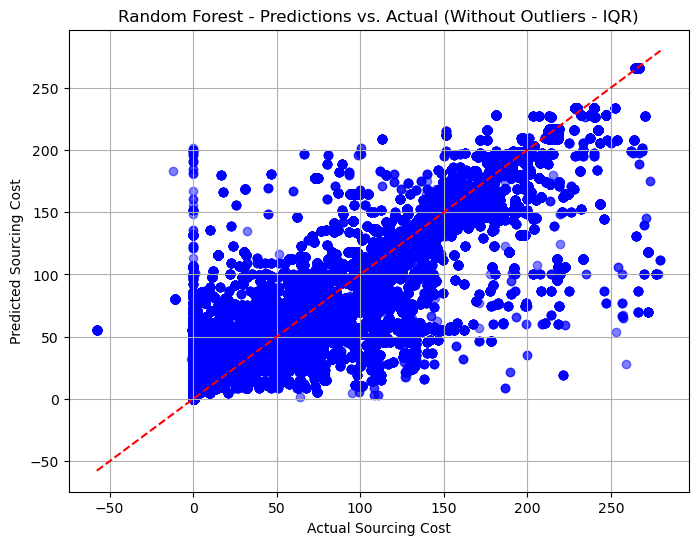

In [68]:
# Filter out outliers
df_no_outliers_iqr = df[(df['Sourcing Cost'] >= lower_threshold) & (df['Sourcing Cost'] <= upper_threshold)]

# Identify categorical columns
categorical_columns = df_no_outliers_iqr.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
df_no_outliers_iqr['Month'] = df_no_outliers_iqr['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers_iqr.drop(columns=['Sourcing Cost'])
y = df_no_outliers_iqr['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers_iqr[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the random forest model
model = RandomForestRegressor()
model.fit(X_final, y)

# Predict using the trained model
y_pred = model.predict(X_final)

# Evaluate the model
mse_rf_iqr = mean_squared_error(y, y_pred)
mae_rf_iqr = mean_absolute_error(y, y_pred)
r2_rf_iqr = r2_score(y, y_pred)
rmse_rf_iqr = np.sqrt(mse_rf_iqr)

print("Mean Squared Error:", mse_rf_iqr)
print("Mean Absolute Error:", mae_rf_iqr)
print("R-squared:", r2_rf_iqr)
print("Root Mean Squared Error:", rmse_rf_iqr)

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Random Forest - Predictions vs. Actual (Without Outliers - IQR)')
plt.grid(True)
plt.show()

## Linear Regression

Linear Regression - Mean Squared Error: 1804.6054056927085
Linear Regression - Mean Absolute Error: 26.501600052194362
Linear Regression - R-squared: 0.3348200210822406
Linear Regression - Root Mean Squared Error: 42.48064742553612


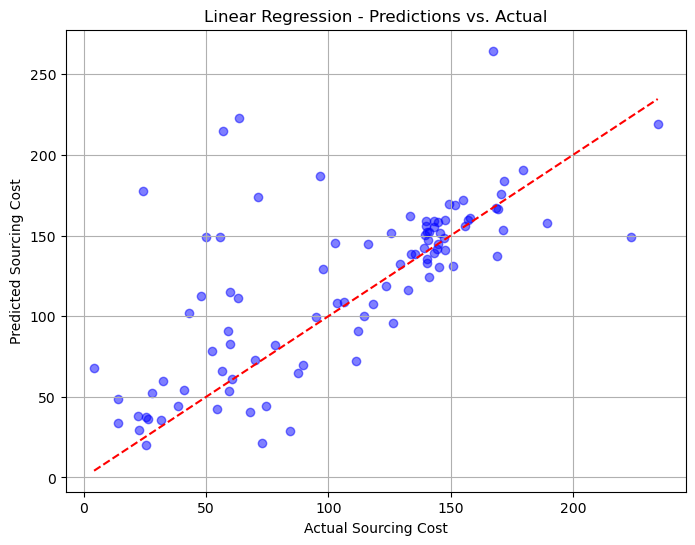

In [46]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_final, y_train)

# Evaluate the Linear Regression model
y_pred_linear = linear_model.predict(X_test_final)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - Mean Absolute Error:", mae_linear)
print("Linear Regression - R-squared:", r2_linear)
print("Linear Regression - Root Mean Squared Error:", rmse_linear)

# Plot predictions vs. actual values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Linear Regression - Predictions vs. Actual')
plt.grid(True)
plt.show()


#### linear regression model using IRQ for outlier/anomaly detecion : Here the outliers are filtered out using IQR(interquartile range) and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1106546368.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1106546368.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1106546368.py:12: 

Linear Regression - Mean Squared Error (IQR): 700.6212281881392
Linear Regression - Mean Absolute Error (IQR): 17.021741911005222
Linear Regression - R-squared (IQR): 0.7751696627631934
Linear Regression - Root Mean Squared Error (IQR): 26.469250616293223


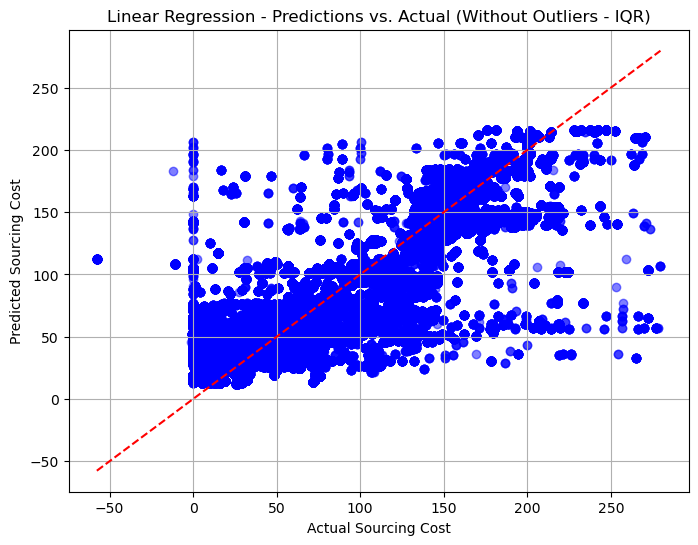

In [69]:
 #Filter out outliers using IQR method
df_no_outliers_iqr = df[(df['Sourcing Cost'] >= lower_threshold) & (df['Sourcing Cost'] <= upper_threshold)]

# Identify categorical columns
categorical_columns = df_no_outliers_iqr.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
df_no_outliers_iqr['Month'] = df_no_outliers_iqr['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers_iqr.drop(columns=['Sourcing Cost'])
y = df_no_outliers_iqr['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers_iqr[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the Linear Regression model
linear_model_iqr = LinearRegression()
linear_model_iqr.fit(X_final, y)

# Predict using the trained model
y_pred_linear_iqr = linear_model_iqr.predict(X_final)

# Evaluate the model
mse_linear_iqr = mean_squared_error(y, y_pred_linear_iqr)
mae_linear_iqr = mean_absolute_error(y, y_pred_linear_iqr)
r2_linear_iqr = r2_score(y, y_pred_linear_iqr)
rmse_linear_iqr = np.sqrt(mse_linear_iqr)

print("Linear Regression - Mean Squared Error (IQR):", mse_linear_iqr)
print("Linear Regression - Mean Absolute Error (IQR):", mae_linear_iqr)
print("Linear Regression - R-squared (IQR):", r2_linear_iqr)
print("Linear Regression - Root Mean Squared Error (IQR):", rmse_linear_iqr)

# Plot predictions vs. actual values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_linear_iqr, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Linear Regression - Predictions vs. Actual (Without Outliers - IQR)')
plt.grid(True)
plt.show()


#### linear regression model using z-score for outlier/anomaly detecion : Here the outliers are filtered out using z-score and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3890826653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month of Sourcing'] = pd.to_datetime(df_no_outliers['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3890826653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Year'] = df_no_outliers['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3890826653.py:12: SettingWithCopyW

Mean Squared Error: 851.7890583295565
Mean Absolute Error: 17.775925477507883
R-squared: 0.7382312592623003
Root Mean Squared Error: 29.18542544369632


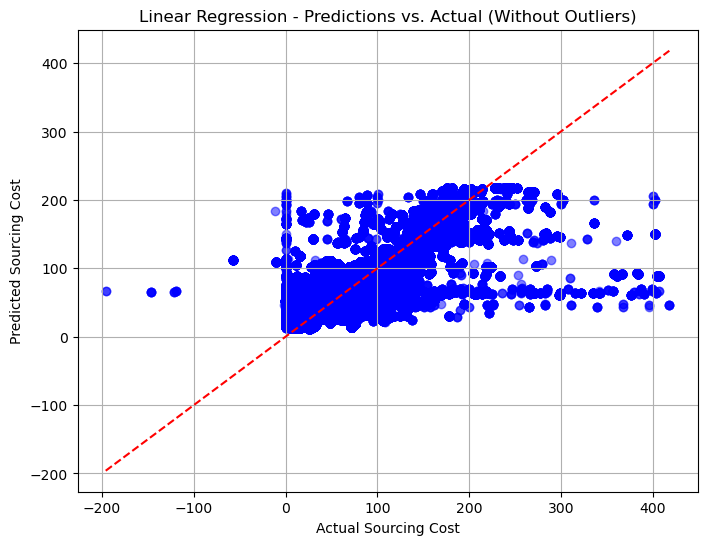

In [70]:
# Filter out outliers from the original dataset
df_no_outliers = df[abs(z_scores) <= threshold]

# Identify categorical columns
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers['Month of Sourcing'] = pd.to_datetime(df_no_outliers['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers['Year'] = df_no_outliers['Month of Sourcing'].dt.year
df_no_outliers['Month'] = df_no_outliers['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers.drop(columns=['Sourcing Cost'])
y = df_no_outliers['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_final, y)

# Predict using the trained model
y_pred = linear_model.predict(X_final)

# Evaluate the model
mse_lr_zscore = mean_squared_error(y, y_pred)
mae_lr_zscore = mean_absolute_error(y, y_pred)
r2_lr_zscore = r2_score(y, y_pred)
rmse_lr_zscore = np.sqrt(mse_lr_zscore)

print("Mean Squared Error:", mse_lr_zscore)
print("Mean Absolute Error:", mae_lr_zscore)
print("R-squared:", r2_lr_zscore)
print("Root Mean Squared Error:", rmse_lr_zscore)

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Linear Regression - Predictions vs. Actual (Without Outliers)')
plt.grid(True)
plt.show()

## KNN 

KNN - Mean Squared Error: 1069.2524501025
KNN - Mean Absolute Error: 18.1434875
KNN - R-squared: 0.6058721092304786
KNN - Root Mean Squared Error: 32.69942583750516


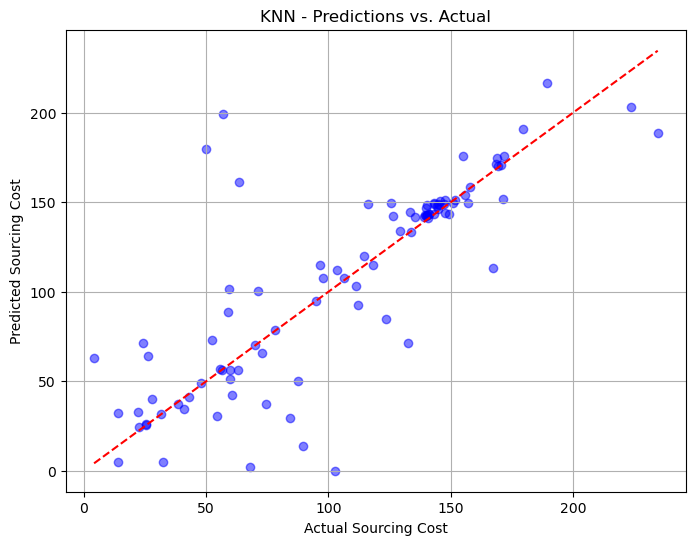

In [59]:
# Train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_final, y_train)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test_final)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("KNN - Mean Squared Error:", mse_knn)
print("KNN - Mean Absolute Error:", mae_knn)
print("KNN - R-squared:", r2_knn)
print("KNN - Root Mean Squared Error:", rmse_knn)

# Plot predictions vs. actual values for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('KNN - Predictions vs. Actual')
plt.grid(True)
plt.show()

#### KNN model using IRQ for outlier/anomaly detecion : Here the outliers are filtered out using IQR(interquartile range) and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3406452655.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3406452655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/3406452655.py:12: 

KNN - Mean Squared Error (IQR): 448.9442999700203
KNN - Mean Absolute Error (IQR): 9.914246489744482
KNN - R-squared (IQR): 0.8559331428997223
KNN - Root Mean Squared Error (IQR): 21.188305736184297


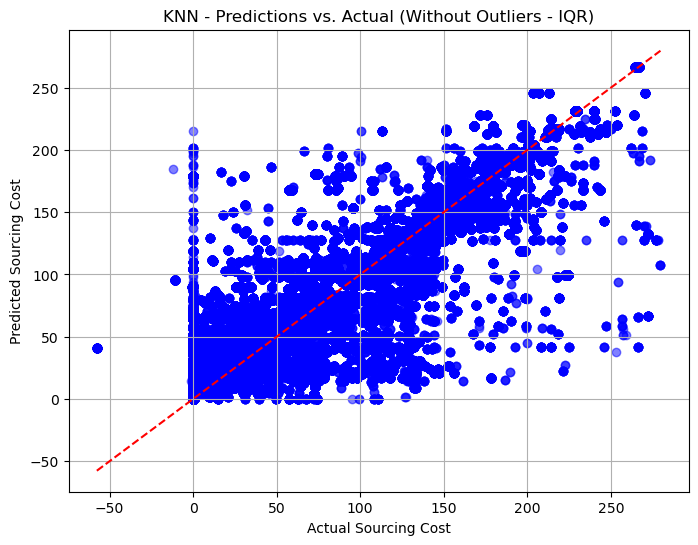

In [60]:
# Filter out outliers using IQR method
df_no_outliers_iqr = df[(df['Sourcing Cost'] >= lower_threshold) & (df['Sourcing Cost'] <= upper_threshold)]

# Identify categorical columns
categorical_columns = df_no_outliers_iqr.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
df_no_outliers_iqr['Month'] = df_no_outliers_iqr['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers_iqr.drop(columns=['Sourcing Cost'])
y = df_no_outliers_iqr['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers_iqr[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the KNN model
knn_model_iqr = KNeighborsRegressor()
knn_model_iqr.fit(X_final, y)

# Predict using the trained model
y_pred_knn_iqr = knn_model_iqr.predict(X_final)

# Evaluate the model
mse_knn_iqr = mean_squared_error(y, y_pred_knn_iqr)
mae_knn_iqr = mean_absolute_error(y, y_pred_knn_iqr)
r2_knn_iqr = r2_score(y, y_pred_knn_iqr)
rmse_knn_iqr = np.sqrt(mse_knn_iqr)

print("KNN - Mean Squared Error (IQR):", mse_knn_iqr)
print("KNN - Mean Absolute Error (IQR):", mae_knn_iqr)
print("KNN - R-squared (IQR):", r2_knn_iqr)
print("KNN - Root Mean Squared Error (IQR):", rmse_knn_iqr)

# Plot predictions vs. actual values for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_knn_iqr, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('KNN - Predictions vs. Actual (Without Outliers - IQR)')
plt.grid(True)
plt.show()


#### KNN model using z-score for outlier/anomaly detecion : Here the outliers are filtered out using z-score and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1179194688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_zscore['Month of Sourcing'] = pd.to_datetime(df_no_outliers_zscore['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1179194688.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_zscore['Year'] = df_no_outliers_zscore['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/117919

KNN - Mean Squared Error (Z-score): 622.3578191839425
KNN - Mean Absolute Error (Z-score): 10.854056863916968
KNN - R-squared (Z-score): 0.8087392400466707
KNN - Root Mean Squared Error (Z-score): 24.947100416359863


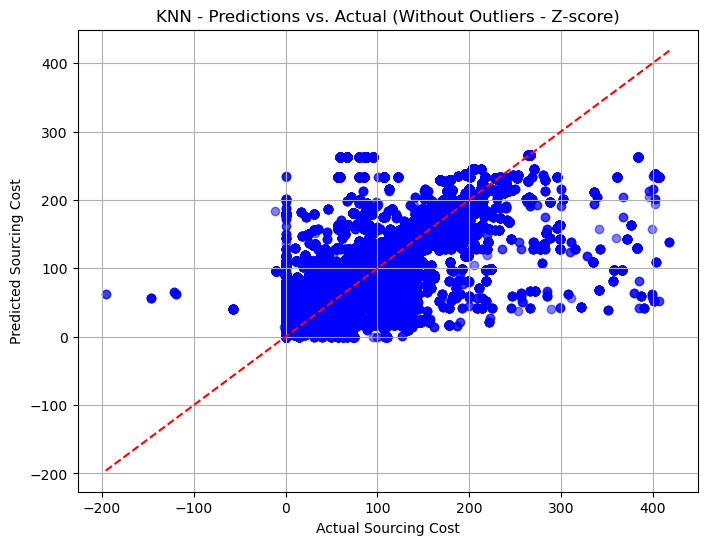

In [62]:
# Filter out outliers using Z-score method
df_no_outliers_zscore = df[np.abs(stats.zscore(df['Sourcing Cost'])) < threshold]

# Identify categorical columns
categorical_columns = df_no_outliers_zscore.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers_zscore['Month of Sourcing'] = pd.to_datetime(df_no_outliers_zscore['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers_zscore['Year'] = df_no_outliers_zscore['Month of Sourcing'].dt.year
df_no_outliers_zscore['Month'] = df_no_outliers_zscore['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers_zscore.drop(columns=['Sourcing Cost'])
y = df_no_outliers_zscore['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers_zscore[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the KNN model
knn_model_zscore = KNeighborsRegressor()
knn_model_zscore.fit(X_final, y)

# Predict using the trained model
y_pred_knn_zscore = knn_model_zscore.predict(X_final)

# Evaluate the model
mse_knn_zscore = mean_squared_error(y, y_pred_knn_zscore)
mae_knn_zscore = mean_absolute_error(y, y_pred_knn_zscore)
r2_knn_zscore = r2_score(y, y_pred_knn_zscore)
rmse_knn_zscore = np.sqrt(mse_knn_zscore)

print("KNN - Mean Squared Error (Z-score):", mse_knn_zscore)
print("KNN - Mean Absolute Error (Z-score):", mae_knn_zscore)
print("KNN - R-squared (Z-score):", r2_knn_zscore)
print("KNN - Root Mean Squared Error (Z-score):", rmse_knn_zscore)

# Plot predictions vs. actual values for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_knn_zscore, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('KNN - Predictions vs. Actual (Without Outliers - Z-score)')
plt.grid(True)
plt.show()


## Gradient Boosting

Gradient Boosting - Mean Squared Error: 1171.4508163724956
Gradient Boosting - Mean Absolute Error: 22.597907613350674
Gradient Boosting - R-squared: 0.568201654012702
Gradient Boosting - Root Mean Squared Error: 34.22646368488126


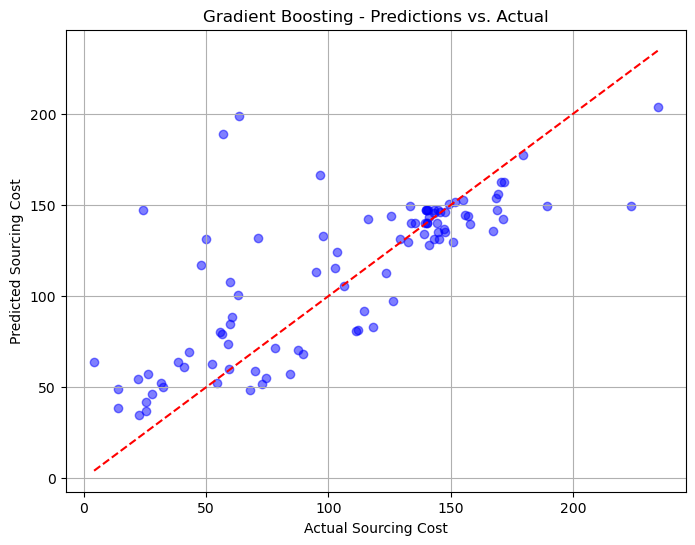

In [63]:
# Train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train_final, y_train)

# Evaluate the Gradient Boosting model
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test_final)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)

print("Gradient Boosting - Mean Squared Error:", mse_gradient_boosting)
print("Gradient Boosting - Mean Absolute Error:", mae_gradient_boosting)
print("Gradient Boosting - R-squared:", r2_gradient_boosting)
print("Gradient Boosting - Root Mean Squared Error:", rmse_gradient_boosting)

# Plot predictions vs. actual values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gradient_boosting, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Gradient Boosting - Predictions vs. Actual')
plt.grid(True)
plt.show()


#### Gradient boosting model using z-score for outlier/anomaly detecion : Here the outliers are filtered out using z-score and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/2667107576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_zscore['Month of Sourcing'] = pd.to_datetime(df_no_outliers_zscore['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/2667107576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_zscore['Year'] = df_no_outliers_zscore['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/266710

Gradient Boosting - Mean Squared Error (Z-score): 842.8886407385451
Gradient Boosting - Mean Absolute Error (Z-score): 18.707636144120055
Gradient Boosting - R-squared (Z-score): 0.7409665034897945
Gradient Boosting - Root Mean Squared Error (Z-score): 29.032544510231016


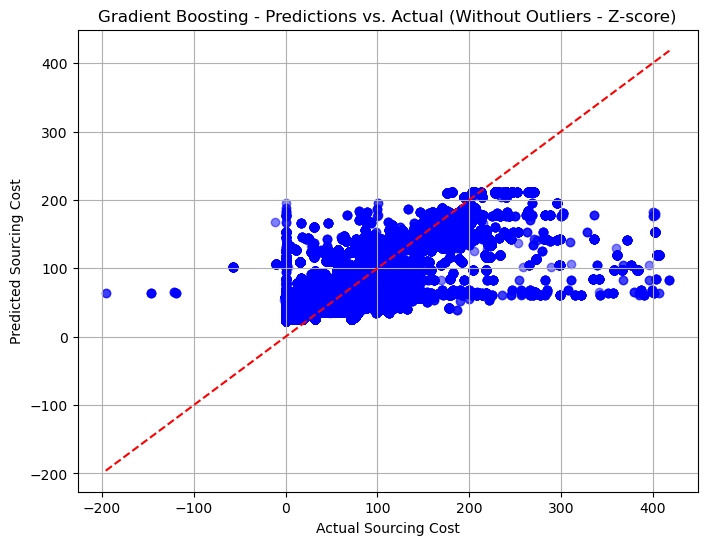

In [64]:
# Filter out outliers using Z-score method
df_no_outliers_zscore = df[np.abs(stats.zscore(df['Sourcing Cost'])) < threshold]

# Identify categorical columns
categorical_columns = df_no_outliers_zscore.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers_zscore['Month of Sourcing'] = pd.to_datetime(df_no_outliers_zscore['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers_zscore['Year'] = df_no_outliers_zscore['Month of Sourcing'].dt.year
df_no_outliers_zscore['Month'] = df_no_outliers_zscore['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers_zscore.drop(columns=['Sourcing Cost'])
y = df_no_outliers_zscore['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers_zscore[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the Gradient Boosting model
gradient_boosting_model_zscore = GradientBoostingRegressor()
gradient_boosting_model_zscore.fit(X_final, y)

# Predict using the trained model
y_pred_gradient_boosting_zscore = gradient_boosting_model_zscore.predict(X_final)

# Evaluate the model
mse_gradient_boosting_zscore = mean_squared_error(y, y_pred_gradient_boosting_zscore)
mae_gradient_boosting_zscore = mean_absolute_error(y, y_pred_gradient_boosting_zscore)
r2_gradient_boosting_zscore = r2_score(y, y_pred_gradient_boosting_zscore)
rmse_gradient_boosting_zscore = np.sqrt(mse_gradient_boosting_zscore)

print("Gradient Boosting - Mean Squared Error (Z-score):", mse_gradient_boosting_zscore)
print("Gradient Boosting - Mean Absolute Error (Z-score):", mae_gradient_boosting_zscore)
print("Gradient Boosting - R-squared (Z-score):", r2_gradient_boosting_zscore)
print("Gradient Boosting - Root Mean Squared Error (Z-score):", rmse_gradient_boosting_zscore)

# Plot predictions vs. actual values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_gradient_boosting_zscore, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Gradient Boosting - Predictions vs. Actual (Without Outliers - Z-score)')
plt.grid(True)
plt.show()


#### Gradient Boosting model using IRQ for outlier/anomaly detecion : Here the outliers are filtered out using IQR(interquartile range) and then the model is trained.

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1483575717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1483575717.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_6328/1483575717.py:12: 

Gradient Boosting - Mean Squared Error (IQR): 723.8604950081095
Gradient Boosting - Mean Absolute Error (IQR): 18.285919315944867
Gradient Boosting - R-squared (IQR): 0.7677121493650024
Gradient Boosting - Root Mean Squared Error (IQR): 26.904655638162506


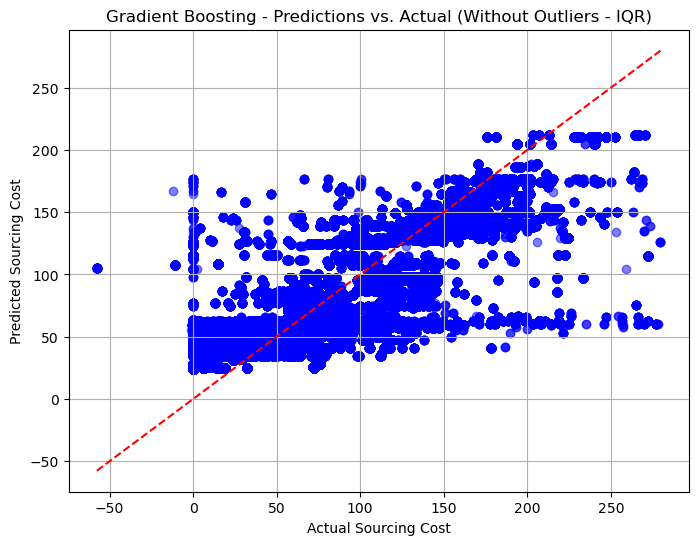

In [65]:
# Filter out outliers using IQR method
df_no_outliers_iqr = df[(df['Sourcing Cost'] >= lower_threshold) & (df['Sourcing Cost'] <= upper_threshold)]

# Identify categorical columns
categorical_columns = df_no_outliers_iqr.select_dtypes(include=['object']).columns.tolist()

# Convert 'Month of Sourcing' to datetime
df_no_outliers_iqr['Month of Sourcing'] = pd.to_datetime(df_no_outliers_iqr['Month of Sourcing'])

# Extract features from datetime column
df_no_outliers_iqr['Year'] = df_no_outliers_iqr['Month of Sourcing'].dt.year
df_no_outliers_iqr['Month'] = df_no_outliers_iqr['Month of Sourcing'].dt.month

# Separate features (X) and target variable (y)
X = df_no_outliers_iqr.drop(columns=['Sourcing Cost'])
y = df_no_outliers_iqr['Sourcing Cost']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded arrays to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(input_features=categorical_columns))

# Combine encoded categorical columns and extracted features
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df_no_outliers_iqr[['Year', 'Month']].reset_index(drop=True)], axis=1)

# Train the Gradient Boosting model
gradient_boosting_model_iqr = GradientBoostingRegressor()
gradient_boosting_model_iqr.fit(X_final, y)

# Predict using the trained model
y_pred_gradient_boosting_iqr = gradient_boosting_model_iqr.predict(X_final)

# Evaluate the model
mse_gradient_boosting_iqr = mean_squared_error(y, y_pred_gradient_boosting_iqr)
mae_gradient_boosting_iqr = mean_absolute_error(y, y_pred_gradient_boosting_iqr)
r2_gradient_boosting_iqr = r2_score(y, y_pred_gradient_boosting_iqr)
rmse_gradient_boosting_iqr = np.sqrt(mse_gradient_boosting_iqr)

print("Gradient Boosting - Mean Squared Error (IQR):", mse_gradient_boosting_iqr)
print("Gradient Boosting - Mean Absolute Error (IQR):", mae_gradient_boosting_iqr)
print("Gradient Boosting - R-squared (IQR):", r2_gradient_boosting_iqr)
print("Gradient Boosting - Root Mean Squared Error (IQR):", rmse_gradient_boosting_iqr)

# Plot predictions vs. actual values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_gradient_boosting_iqr, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Gradient Boosting - Predictions vs. Actual (Without Outliers - IQR)')
plt.grid(True)
plt.show()


## Evaluation Table 

In [71]:
#Define evaluation scores for each model and outlier removal method
evaluation_data = {
    'Model': ['Random Forest (IQR)', 'Random Forest (Z-score)', 'KNN (IQR)', 'KNN (Z-score)',
              'Linear Regression (IQR)', 'Linear Regression (Z-score)', 
              'Gradient Boosting (IQR)', 'Gradient Boosting (Z-score)'],
    'Mean Squared Error': [mse_rf_iqr, mse_rf_zscore, mse_knn_iqr, mse_knn_zscore,
                           mse_linear_iqr, mse_lr_zscore, mse_gradient_boosting_iqr, mse_gradient_boosting_zscore],
    'Mean Absolute Error': [mae_rf_iqr, mae_rf_zscore, mae_knn_iqr, mae_knn_zscore,
                            mae_linear_iqr, mae_lr_zscore, mae_gradient_boosting_iqr, mae_gradient_boosting_zscore],
    'R-squared': [r2_rf_iqr, r2_rf_zscore, r2_knn_iqr, r2_knn_zscore,
                  r2_linear_iqr, r2_lr_zscore, r2_gradient_boosting_iqr, r2_gradient_boosting_zscore],
    'Root Mean Squared Error': [rmse_rf_iqr, rmse_rf_zscore, rmse_knn_iqr, rmse_knn_zscore,
                                 rmse_linear_iqr, rmse_lr_zscore, rmse_gradient_boosting_iqr, rmse_gradient_boosting_zscore]
}

# Create DataFrame to store evaluation scores
evaluation_table = pd.DataFrame(evaluation_data)

# Display the table
print("Evaluation Scores for Different Models with Outliers Removed (IQR and Z-score):")
print(evaluation_table)

Evaluation Scores for Different Models with Outliers Removed (IQR and Z-score):
                         Model  Mean Squared Error  Mean Absolute Error  \
0          Random Forest (IQR)          364.872922             9.077356   
1      Random Forest (Z-score)          483.166616             9.808285   
2                    KNN (IQR)          448.944300             9.914246   
3                KNN (Z-score)          622.357819            10.854057   
4      Linear Regression (IQR)          700.621228            17.021742   
5  Linear Regression (Z-score)          851.789058            17.775925   
6      Gradient Boosting (IQR)          723.860495            18.285919   
7  Gradient Boosting (Z-score)          842.888641            18.707636   

   R-squared  Root Mean Squared Error  
0   0.882912                19.101647  
1   0.851515                21.981051  
2   0.855933                21.188306  
3   0.808739                24.947100  
4   0.775170                26.469251  
5   

In [72]:
from tabulate import tabulate

# Display the table using tabulate
print(tabulate(evaluation_table, headers='keys', tablefmt='grid'))


+----+-----------------------------+----------------------+-----------------------+-------------+---------------------------+
|    | Model                       |   Mean Squared Error |   Mean Absolute Error |   R-squared |   Root Mean Squared Error |
+====+=============================+======================+=======================+=============+===========================+
|  0 | Random Forest (IQR)         |              364.873 |               9.07736 |    0.882912 |                   19.1016 |
+----+-----------------------------+----------------------+-----------------------+-------------+---------------------------+
|  1 | Random Forest (Z-score)     |              483.167 |               9.80829 |    0.851515 |                   21.9811 |
+----+-----------------------------+----------------------+-----------------------+-------------+---------------------------+
|  2 | KNN (IQR)                   |              448.944 |               9.91425 |    0.855933 |                   21


In conclusion, Random Forest with Interquartile Range (IQR) outlier removal emerges as the top-performing model among those tested.

Robustness to Outliers: The IQR method effectively filters out outliers, ensuring that the Random Forest model is trained on a more representative and less biased dataset. This robustness to outliers enhances the model's ability to generalize well to unseen data.

Ensemble Learning: Random Forest leverages ensemble learning, combining multiple decision trees trained on random subsets of the data. This ensemble approach mitigates overfitting and improves predictive accuracy by capturing diverse patterns in the data.

Non-linear Relationships: Random Forest can model complex, non-linear relationships between features and the target variable. This flexibility allows the model to capture intricate patterns that may exist in the data, leading to superior predictive performance.

Feature Importance: Random Forest provides insights into feature importance, enabling us to identify the most influential predictors. This feature analysis aids in understanding the underlying factors driving the predicted outcomes and can inform decision-making in real-world applications.